In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import log_loss

In [35]:
train_df = pd.read_json("new_train.json.zip")
data = train_df.head(5000)

In [36]:
train_df = train_df.head(5000)
train_df.shape

(5000, 26)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.05090055 0.02074132 0.08667764 0.11677249 0.07359146 0.08634383
 0.07919365 0.08582022 0.00051516 0.0818467  0.07984395 0.0779819
 0.0809745  0.07879664]
price                 0.116772
latitude              0.086678
length_description    0.086344
closest_hospital      0.085820
created_day           0.081847
mean_des_tdidf        0.080974
created_hour          0.079844
closest_station       0.079194
mean_feature_tdidf    0.078797
photos_num            0.077982
dtype: float64


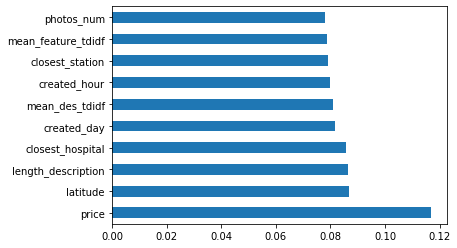

In [37]:
# Feature Selection
cols = ['bedrooms', 'bathrooms', 'latitude', 
        'price', 'number_features', 
        'length_description', 'closest_station', 'closest_hospital',
        'created_month', 'created_day', 'created_hour', 'photos_num', 
        'mean_des_tdidf', 'mean_feature_tdidf']

X = train_df[cols]
y = train_df['interest_level']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
# plt.show()
print(feat_importances.nlargest(10))

In [38]:
top_cols = ['price', 'latitude', 'mean_des_tdidf', 
            'length_description', 'created_hour', 'closest_hospital',
            'closest_station', 'mean_feature_tdidf', 'created_day',
            'photos_num']

In [43]:
# Checking for overfitting
X = train_df[top_cols]
y = train_df['interest_level']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)


model = make_pipeline(
        SVC(gamma='auto')
    )

model.fit(X_train, y_train)

accuracies = cross_val_score(estimator=model,X=X,y=y,cv=5)
print('Training accuracy :', np.mean(accuracies))

predictions = model.predict(X_valid)
test_accuracy = accuracy_score(predictions, y_valid)
print('Test accuracy :', test_accuracy)

Training accuracy : 0.6962004786004785
Test accuracy : 0.6746666666666666


In [31]:
test_df = pd.read_json("new_test.json.zip")
X_test = test_df[top_cols]

model = model.fit(X,y)

y_pred = model.predict_proba(X_test)

submission = pd.DataFrame({
    "listing_id": test_df["listing_id"],
    "high": y_pred[:,0],
    "medium":y_pred[:,1],
    "low":y_pred[:,2]
})

titles_columns=["listing_id","high","medium","low"]
submission=submission.reindex(columns=titles_columns)
submission.to_csv('og_submission.csv', index=False)

In [40]:
# Tying to improve model accuracy 
X = train_df[top_cols]
y = train_df['interest_level']
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

model = make_pipeline(
        StandardScaler(),
        PCA(n_components=2),
        SVC(kernel='rbf', gamma=0.1, C=10, probability=True)
    )

# model.fit(X_train, y_train)
# score = model.score(X_valid, y_valid)
# print(score)

accuracies = cross_val_score(estimator=model,X=X,y=y,cv=5, scoring='accuracy')
accuracies
print('Training accuracy :', np.mean(accuracies))

Scores from each Iteration:  [0.7025, 0.6965, 0.69825, 0.6945, 0.69425]
Scores from each Iteration:  [0.676, 0.699, 0.693, 0.708, 0.709]
Improved Average k-fold on training:  0.6971999999999999
Improved Average k-fold on validation:  0.697
Improved Average k-fold on validation using logloss:  0.99755


In [ ]:
# Parameter Tuning

# parameters = [{'C':[0.01,0.1,1,10,50,100,500,1000], 'kernel':['rbf'], 'gamma': [0.1,0.125,0.15,0.17,0.2]}]
# grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring ='accuracy',cv=5,n_jobs=-1)
# grid_search = grid_search.fit(X_train,y_train)

# best_accuracy = grid_search.best_score_
# best_accuracy
# opt_param = grid_search.best_params_
# opt_param
# Best params are {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
test_df = pd.read_json("new_test.json.zip")
X_test = test_df[top_cols]
# accuracies = cross_val_score(estimator=model,X=X,y=y,cv=5, scoring='accuracy')
# accuracies
# print('Training accuracy :', np.mean(accuracies))
X_test.shape

In [ ]:
model = model.fit(X,y)

y_pred = model.predict_proba(X_test)

submission = pd.DataFrame({
    "listing_id": test_df["listing_id"],
    "high": y_pred[:,0],
    "medium":y_pred[:,1],
    "low":y_pred[:,2]
})

titles_columns=["listing_id","high","medium","low"]
submission=submission.reindex(columns=titles_columns)
submission.to_csv('improved_submission.csv', index=False)